In [1]:
import json
import numpy as np
import pandas as pd
import scipy.stats as st

import matplotlib.pyplot as plt

In [2]:
# Here we can add all the methods we have/want
models_list = ['clip_baseline',
    'coop_baseline', 'coop_pseudo_baseline',
    'vpt_baseline', 'vpt_pseudo_baseline', 
    'teacher_student',
]

In [3]:
model = models_list[-1]
print(model)
filename = f"results/results_model_{model}.json"

data = [json.loads(i) for i in open(filename,'r').readlines()]

teacher_student


In [5]:
std_accuracies = []
gen_accuracies = []
seen_accuracies = []
unseen_accuracies = []
harmonic_accuracies = []

fix_num = 0


for m in data:
    # Here change and filter data depending on what results we want/
    # For instance, let's assume we want 
    if (
        (m['config']['DATASET_NAME'] == 'Flowers102')  \
         and (m['config']['VIS_ENCODER'] == 'ViT-B/32') \
         and (m['config']['SPLIT_SEED'] == 500) \
    ):
        std_accuracies.append(m['std_accuracy'])
        gen_accuracies.append(m['gen_accuracy'])
        seen_accuracies.append(m['gen_seen'])
        unseen_accuracies.append(m['gen_unseen'])
        harmonic_accuracies.append(st.hmean([m['gen_seen'], m['gen_unseen']]))
        
std_accuracies = std_accuracies[fix_num:]
gen_accuracies = gen_accuracies[fix_num:]
seen_accuracies = seen_accuracies[fix_num:]
unseen_accuracies = unseen_accuracies[fix_num:]
harmonic_accuracies = harmonic_accuracies[fix_num:]

print(f"Mean STD accuracy: {round((np.sum(std_accuracies)/len(std_accuracies))*100, 2)}")
print(f"Std STD accuracy: {np.std(std_accuracies)}")
interval = st.t.interval(alpha=0.95, df=len(std_accuracies)-1, loc=np.mean(std_accuracies), scale=st.sem(std_accuracies)) 
print(f"95% STD confidence interval {round((np.sum(std_accuracies)/len(std_accuracies) - interval[0])*100, 2)}")
print('\n')

print(f"Mean SEEN accuracy: {round((np.sum(seen_accuracies)/len(seen_accuracies))*100, 2)}")
print(f"Std SEEN accuracy: {np.std(seen_accuracies)}")
interval = st.t.interval(alpha=0.95, df=len(seen_accuracies)-1, loc=np.mean(seen_accuracies), scale=st.sem(seen_accuracies)) 
print(f"95% SEEN confidence interval {round((np.sum(seen_accuracies)/len(seen_accuracies) - interval[0])*100, 2)}")
print('\n')

print(f"Mean UNSEEN accuracy: {round((np.sum(unseen_accuracies)/len(unseen_accuracies))*100,2)}")
print(f"Std UNSEEN accuracy: {np.std(unseen_accuracies)}")
interval = st.t.interval(alpha=0.95, df=len(unseen_accuracies)-1, loc=np.mean(unseen_accuracies), scale=st.sem(unseen_accuracies)) 
print(f"95% UNSEEN confidence interval {round((np.sum(unseen_accuracies)/len(unseen_accuracies) - interval[0])*100,2)}")
print('\n')

print(f"Mean HARMONIC accuracy: {round((np.sum(harmonic_accuracies)/len(harmonic_accuracies))*100, 2)}")
print(f"Std HARMONIC accuracy: {np.std(harmonic_accuracies)}")
interval = st.t.interval(alpha=0.95, df=len(harmonic_accuracies)-1, loc=np.mean(harmonic_accuracies), scale=st.sem(harmonic_accuracies)) 
print(f"95% HARMONIC confidence interval {round((np.sum(harmonic_accuracies)/len(harmonic_accuracies) - interval[0])*100, 2)}")

Mean STD accuracy: 82.76
Std STD accuracy: 0.006392898964132173
95% STD confidence interval 0.89


Mean SEEN accuracy: 75.78
Std SEEN accuracy: 0.005193545968350561
95% SEEN confidence interval 0.72


Mean UNSEEN accuracy: 78.92
Std UNSEEN accuracy: 0.008059541466209097
95% UNSEEN confidence interval 1.12


Mean HARMONIC accuracy: 77.32
Std HARMONIC accuracy: 0.004679945524518792
95% HARMONIC confidence interval 0.65


In [6]:
seen_accuracies

[0.7559820538384845,
 0.7619641076769691,
 0.7485044865403788,
 0.7597208374875374,
 0.7627118644067796]

In [7]:
unseen_accuracies

[0.7810014038371549,
 0.789424426766495,
 0.7903603182030885,
 0.8034627983153955,
 0.7819372952737482]

In [8]:
harmonic_accuracies

[0.7682880936356221,
 0.7754512368306479,
 0.7688631806185371,
 0.7809798107472069,
 0.7722049354570382]

In [9]:
std_accuracies

[0.8207767898923725,
 0.8235844642021526,
 0.8296677585400094,
 0.8390266729059429,
 0.8249883013570426]

In [369]:
def compute_lists(dict_alphas):
    stds = []
    for i in sorted(dict_alphas):
        stds.append(dict_alphas[i]['mean_std'])
    err_stds = []
    for i in sorted(dict_alphas):
        err_stds.append(dict_alphas[i]['95_std'])

    seens = []
    for i in sorted(dict_alphas):
        seens.append(dict_alphas[i]['mean_seen'])
    err_seens = []
    for i in sorted(dict_alphas):
        err_seens.append(dict_alphas[i]['95_seen'])

    unseens = []
    for i in sorted(dict_alphas):
        unseens.append(dict_alphas[i]['mean_unseen'])
    err_unseens = []
    for i in sorted(dict_alphas):
        err_unseens.append(dict_alphas[i]['95_unseen'])

    harms = []
    for i in sorted(dict_alphas):
        harms.append(dict_alphas[i]['mean_harm'])
    err_harms = []
    for i in sorted(dict_alphas):
        err_harms.append(dict_alphas[i]['95_harm'])
        
    return stds, err_stds, seens, err_seens, unseens, err_unseens, harms, err_harms

def plot_lines(name, 
               stds,
               err_stds, 
               seens, 
               err_seens, 
               unseens, 
               err_unseens, 
               harms, 
               err_harms,
              zsl,
              s,
              u,
              h):
    
    plt.errorbar(range(11), stds, yerr=err_stds, fmt='-o', label='ZSL')
    plt.errorbar(range(11), seens, yerr=err_seens, fmt='-o', label='S')
    plt.errorbar(range(11), unseens, yerr=err_unseens, fmt='-o', label='U')
    plt.errorbar(range(11), harms, yerr=err_harms, fmt='-o', label='H')
    plt.xticks(range(11), [round(n,1) for n in np.arange(0,1.1,0.1)])
    plt.ylim(0,100)
    plt.title(f'{name} - Mix Prompts - Seen Init', fontsize=15)
    plt.xlabel('Alpha', fontsize=13)
    plt.ylabel('Accuracy (%)', fontsize=13)
    plt.axhline(y = zsl, color = 'b', linestyle = '-', label='ZSL w Labels')
    plt.axhline(y = s, color = 'orange', linestyle = '-.', label='S w Labels')
    plt.axhline(y = u, color = 'green', linestyle = ':', label='U w Labels')
    plt.axhline(y = h, color = 'red', linestyle = '--', label='H w Labels')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

In [341]:
# Here we can add all the methods we have/want
models_list = ['mix_vpt_baseline',
               'combo_vpt_baseline',
               'after_combo_vpt_baseline',
               'post_vpt_baseline',
]

In [393]:
model = models_list[0]
print(model)
filename = f"results/results_model_{model}.json"

data = [json.loads(i) for i in open(filename,'r').readlines()]

mix_vpt_baseline


In [394]:
np.arange(0,1.1,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [402]:
dict_alphas = {}
fix_num = 0

for a in np.arange(0,1.1,0.1):
    std_accuracies = []
    gen_accuracies = []
    seen_accuracies = []
    unseen_accuracies = []
    harmonic_accuracies = []
    a = round(a, 1)
    print(f"ALPHA: {a}")
    for m in data:
        # Here change and filter data depending on what results we want/
        # For instance, let's assume we want 
        if (
            (m['config']['DATASET_NAME'] == 'Flowers102')  \
             and (m['config']['VIS_ENCODER'] == 'ViT-B/32') \
             and (m['config']['SPLIT_SEED'] == 500) \
             and (m['config']['ALPHA'] == a)
        ):
            std_accuracies.append(m['std_accuracy'])
            gen_accuracies.append(m['gen_accuracy'])
            seen_accuracies.append(m['gen_seen'])
            unseen_accuracies.append(m['gen_unseen'])
            harmonic_accuracies.append(st.hmean([m['gen_seen'], m['gen_unseen']]))

    std_accuracies = std_accuracies[fix_num:]
    gen_accuracies = gen_accuracies[fix_num:]
    seen_accuracies = seen_accuracies[fix_num:]
    unseen_accuracies = unseen_accuracies[fix_num:]
    harmonic_accuracies = harmonic_accuracies[fix_num:]

    print(f"Mean STD accuracy: {round((np.sum(std_accuracies)/len(std_accuracies))*100, 2)}")
    print(f"Std STD accuracy: {np.std(std_accuracies)}")
    interval_1 = st.t.interval(alpha=0.95, df=len(std_accuracies)-1, loc=np.mean(std_accuracies), scale=st.sem(std_accuracies)) 
    print(f"95% STD confidence interval {round((np.sum(std_accuracies)/len(std_accuracies) - interval_1[0])*100, 2)}")
    print('\n')

    print(f"Mean SEEN accuracy: {round((np.sum(seen_accuracies)/len(seen_accuracies))*100, 2)}")
    print(f"Std SEEN accuracy: {np.std(seen_accuracies)}")
    interval_2 = st.t.interval(alpha=0.95, df=len(seen_accuracies)-1, loc=np.mean(seen_accuracies), scale=st.sem(seen_accuracies)) 
    print(f"95% SEEN confidence interval {round((np.sum(seen_accuracies)/len(seen_accuracies) - interval_2[0])*100, 2)}")
    print('\n')

    print(f"Mean UNSEEN accuracy: {round((np.sum(unseen_accuracies)/len(unseen_accuracies))*100,2)}")
    print(f"Std UNSEEN accuracy: {np.std(unseen_accuracies)}")
    interval_3 = st.t.interval(alpha=0.95, df=len(unseen_accuracies)-1, loc=np.mean(unseen_accuracies), scale=st.sem(unseen_accuracies)) 
    print(f"95% UNSEEN confidence interval {round((np.sum(unseen_accuracies)/len(unseen_accuracies) - interval_3[0])*100,2)}")
    print('\n')

    print(f"Mean HARMONIC accuracy: {round((np.sum(harmonic_accuracies)/len(harmonic_accuracies))*100, 2)}")
    print(f"Std HARMONIC accuracy: {np.std(harmonic_accuracies)}")
    interval_4 = st.t.interval(alpha=0.95, df=len(harmonic_accuracies)-1, loc=np.mean(harmonic_accuracies), scale=st.sem(harmonic_accuracies)) 
    print(f"95% HARMONIC confidence interval {round((np.sum(harmonic_accuracies)/len(harmonic_accuracies) - interval_4[0])*100, 2)}")
    
    dict_alphas[a] = {'mean_std': round((np.sum(std_accuracies)/len(std_accuracies))*100, 2) ,
                     '95_std': round((np.sum(std_accuracies)/len(std_accuracies) - interval_1[0])*100, 2),
                     'mean_seen': round((np.sum(seen_accuracies)/len(seen_accuracies))*100, 2),
                     '95_seen': round((np.sum(seen_accuracies)/len(seen_accuracies) - interval_2[0])*100, 2),
                     'mean_unseen': round((np.sum(unseen_accuracies)/len(unseen_accuracies))*100,2),
                     '95_unseen': round((np.sum(unseen_accuracies)/len(unseen_accuracies) - interval_3[0])*100,2),
                     'mean_harm': round((np.sum(harmonic_accuracies)/len(harmonic_accuracies))*100, 2),
                     '95_harm': round((np.sum(harmonic_accuracies)/len(harmonic_accuracies) - interval_4[0])*100, 2),}

ALPHA: 0.0
Mean STD accuracy: 64.49
Std STD accuracy: 0.015720190496822443
95% STD confidence interval 2.18


Mean SEEN accuracy: 82.17
Std SEEN accuracy: 0.01647223575246948
95% SEEN confidence interval 2.29


Mean UNSEEN accuracy: 51.25
Std UNSEEN accuracy: 0.008944498120333443
95% UNSEEN confidence interval 1.24


Mean HARMONIC accuracy: 63.11
Std HARMONIC accuracy: 0.004818818659910794
95% HARMONIC confidence interval 0.67
ALPHA: 0.1
Mean STD accuracy: 72.81
Std STD accuracy: 0.00500505080285296
95% STD confidence interval 0.69


Mean SEEN accuracy: 70.02
Std SEEN accuracy: 0.01943809563901547
95% SEEN confidence interval 2.7


Mean UNSEEN accuracy: 59.14
Std UNSEEN accuracy: 0.023098513559803274
95% UNSEEN confidence interval 3.21


Mean HARMONIC accuracy: 64.06
Std HARMONIC accuracy: 0.009454888480696373
95% HARMONIC confidence interval 1.31
ALPHA: 0.2
Mean STD accuracy: 74.07
Std STD accuracy: 0.006573929556887585
95% STD confidence interval 0.91


Mean SEEN accuracy: 67.83
Std 

In [396]:
import matplotlib.pyplot as plt

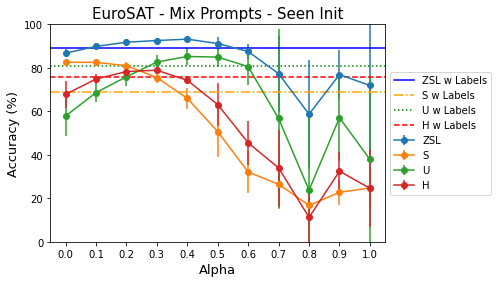

In [397]:
# plt.plot(stds, '-o')
stds, err_stds, \
seens, err_seens, \
unseens, err_unseens, \
harms, err_harms = compute_lists(dict_alphas)

plot_lines('EuroSAT', 
               stds,
               err_stds, 
               seens, 
               err_seens, 
               unseens, 
               err_unseens, 
               harms, 
               err_harms,
          89,
          69,
          81,
          76)

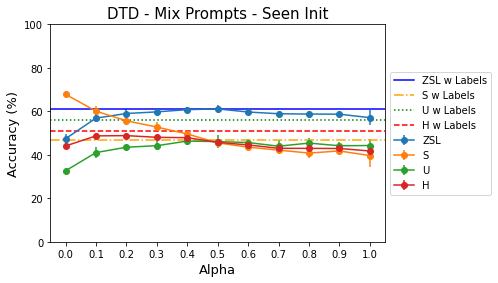

In [399]:
# plt.plot(stds, '-o')
stds, err_stds, \
seens, err_seens, \
unseens, err_unseens, \
harms, err_harms = compute_lists(dict_alphas)

plot_lines('DTD', 
               stds,
               err_stds, 
               seens, 
               err_seens, 
               unseens, 
               err_unseens, 
               harms, 
               err_harms,
          61,
          47,
          56,
          51)

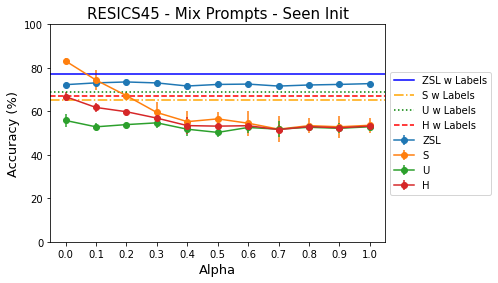

In [401]:
# plt.plot(stds, '-o')
stds, err_stds, \
seens, err_seens, \
unseens, err_unseens, \
harms, err_harms = compute_lists(dict_alphas)

plot_lines('RESICS45', 
               stds,
               err_stds, 
               seens, 
               err_seens, 
               unseens, 
               err_unseens, 
               harms, 
               err_harms,
          77,
          65,
          69,
          67)

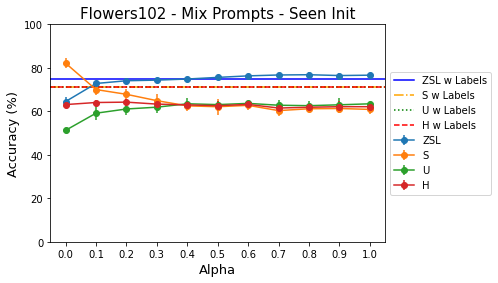

In [403]:
# plt.plot(stds, '-o')
stds, err_stds, \
seens, err_seens, \
unseens, err_unseens, \
harms, err_harms = compute_lists(dict_alphas)

plot_lines('Flowers102', 
               stds,
               err_stds, 
               seens, 
               err_seens, 
               unseens, 
               err_unseens, 
               harms, 
               err_harms,
          75,
          71,
          71,
          71)

In [405]:
!pip install torchsort

  Using cached torchsort-0.1.9.tar.gz (12 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for torchsort: filename=torchsort-0.1.9-cp38-cp38-macosx_10_9_x86_64.whl size=90029 sha256=7e8078fd64392c403351ff3ba1f3203cd59fb97b66f8417c6870d06c9f4206ee
  Stored in directory: /Users/menga/Library/Caches/pip/wheels/8c/57/49/98ceaf2cc643111a82a6863cdaead4fa85ebb4d71d83c58a83
Successfully built torchsort

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [406]:
import torch
import torchsort

def spearmanr(pred, target, **kw):
    pred = torchsort.soft_rank(pred, **kw)
    target = torchsort.soft_rank(target, **kw)
    pred = pred - pred.mean()
    pred = pred / pred.norm()
    target = target - target.mean()
    target = target / target.norm()
    return (pred * target).sum()

pred = torch.tensor([[1., 2., 3., 4., 5.]], requires_grad=True)
target = torch.tensor([[5., 6., 7., 8., 7.]])
spearman = spearmanr(pred, target)
# tensor(0.8321)

torch.autograd.grad(spearman, pred)

(tensor([[-5.5470e-02,  2.9802e-09,  5.5470e-02,  1.1094e-01, -1.1094e-01]]),)

In [407]:
pred = torch.tensor([[0.2, 0.4, 0.1, 0.3, 0.5]], requires_grad=True)
target = torch.tensor([[0.4, 0.2, 0.5, 0.3, 0.1]])

In [408]:
spearman = spearmanr(pred, target)

In [409]:
spearman

tensor(-1.0000, grad_fn=<SumBackward0>)

In [258]:
unseen_accuracies

[0.5786533665835412,
 0.5786533665835412,
 0.5660847880299252,
 0.5342643391521197,
 0.5314713216957606,
 0.5800498753117207,
 0.5781546134663341]

In [259]:
harmonic_accuracies

[0.684705011603635,
 0.684705011603635,
 0.6727881978480763,
 0.6515637865169928,
 0.6509924874542248,
 0.677908121449633,
 0.6844654818035285]

In [260]:
std_accuracies

[0.7275810473815462,
 0.7275810473815462,
 0.7275810473815462,
 0.7208977556109726,
 0.710423940149626,
 0.7270822942643391,
 0.7279800498753117]

In the google sheets, I report the mean and the confidence interval.

In [10]:
a = [0.906, 0.772, 0.567, 0.8936]

In [11]:
b = [0.8175, 0.8405, 0.8705, 0.7975]

In [12]:
np.mean(st.hmean([a, b]))

0.7984508171723251

In [13]:
import pickle

In [141]:
classes = []
with open(f"pseudolabels/train.json", "r") as f:
    data = json.load(f)
    for d in data["categories"]:
        classes.append(d["name"].replace("_", " "))

# classes = []
# with open(f"pseudolabels/flo_classes.txt", 'r') as file:
#     for l in file:
#         classes.append(l.strip())

class_dict = {i:c for i,c in enumerate(classes)}
class_dict

{0: 'airplane',
 1: 'airport',
 2: 'baseball diamond',
 3: 'basketball court',
 4: 'beach',
 5: 'bridge',
 6: 'chaparral',
 7: 'church',
 8: 'circular farmland',
 9: 'cloud',
 10: 'commercial area',
 11: 'dense residential',
 12: 'desert',
 13: 'forest',
 14: 'freeway',
 15: 'golf course',
 16: 'ground track field',
 17: 'harbor',
 18: 'industrial area',
 19: 'intersection',
 20: 'island',
 21: 'lake',
 22: 'meadow',
 23: 'medium residential',
 24: 'mobile home park',
 25: 'mountain',
 26: 'overpass',
 27: 'palace',
 28: 'parking lot',
 29: 'railway',
 30: 'railway station',
 31: 'rectangular farmland',
 32: 'river',
 33: 'roundabout',
 34: 'runway',
 35: 'sea ice',
 36: 'ship',
 37: 'snowberg',
 38: 'sparse residential',
 39: 'stadium',
 40: 'storage tank',
 41: 'tennis court',
 42: 'terrace',
 43: 'thermal power station',
 44: 'wetland'}

In [142]:
with open('pseudolabels/RESICS45_ViT-B32_14_pseudolabels_split_500.pickle', 'rb') as f:
    clip = pickle.load(f)

In [124]:
with open('pseudolabels/Flowers102_teacher_student_ViT-B32_teacher_iter_1_opt_1_pseudolabels_spl_500_s_epochs_50_before_student.pickle', 'rb') as f:
#with open('pseudolabels/DTD_teacher_student_ViT-B32_teacher_iter_3_pseudolabels_spl_500.pickle', 'rb') as f:
    teacher_bef = pickle.load(f)

In [123]:
with open('pseudolabels/Flowers102_teacher_student_ViT-B32_teacher_iter_1_opt_1_pseudolabels_spl_500_s_epochs_50.pickle', 'rb') as f:
    teacher = pickle.load(f)

In [125]:
with open('pseudolabels/Flowers102_teacher_student_ViT-B32_student_iter_0_opt_1_pseudolabels_spl_500_s_epochs_50.pickle', 'rb') as f:
    student = pickle.load(f)

In [53]:
# with open('pseudolabels/Flowers102_ablation_teacher_student_ViT-B32_teacher_iter_2_pseudolabels_spl_500.pickle', 'rb') as f:
#     student = pickle.load(f)

In [113]:
len(list(zip(teacher_bef['filepaths'], teacher_bef['labels'])))

78

In [114]:
len(list(zip(teacher['filepaths'], teacher['labels'])))

156

In [115]:
len(list(zip(student['filepaths'], student['labels'])))

78

In [116]:
len((set(teacher['filepaths'])).intersection(set(student['filepaths'])))

56

In [127]:
correct = 0
for f, l in list(zip(teacher_bef['filepaths'], teacher_bef['labels'])):
    #print(f)
    #cls = ' '.join(f.split('/')[-1].split('_')[:-1]).strip()
    cls = class_dict[int(f.split('/')[-2])]
    #cls = (f.split('/')[-2])
    #print(cls)
    true_cls = class_dict[int(l)]
    #print(cls, true_cls)
    if cls == true_cls:
        correct += 1
    else:
        continue
        print(cls, true_cls)
        
print(len(teacher_bef['filepaths']))
print(correct)
print(correct/len(teacher_bef['filepaths']))

78
70
0.8974358974358975


In [128]:
correct = 0
for f, l in list(zip(teacher['filepaths'], teacher['labels'])):
    #print(f)
    #cls = ' '.join(f.split('/')[-1].split('_')[:-1]).strip()
    cls = class_dict[int(f.split('/')[-2])]
    #cls = (f.split('/')[-2])
    #print(cls)
    true_cls = class_dict[int(l)]
    #print(cls, true_cls)
    if cls == true_cls:
        correct += 1
    else:
        continue
        print(cls, true_cls)
        
print(len(teacher['filepaths']))
print(correct)
print(correct/len(teacher['filepaths']))

156
143
0.9166666666666666


In [126]:
correct = 0
for f, l in list(zip(student['filepaths'], student['labels'])):
    # cls = ' '.join(f.split('/')[-1].split('_')[:-1]).strip()
    cls = class_dict[int(f.split('/')[-2])]
    #cls = (f.split('/')[-2])
    true_cls = class_dict[int(l)]
    if cls == true_cls:
        correct += 1
    else:
        continue
        print(cls, true_cls)

print(len(student['filepaths']))
print(correct)
print(correct/len(student['filepaths']))

78
69
0.8846153846153846


In [403]:
correct

212

In [143]:
correct = 0
for f, l in list(zip(clip['filepaths'], clip['labels'])):
    cls = ' '.join(f.split('/')[-1].split('_')[:-1]).strip()
    #cls = class_dict[int(f.split('/')[-2])]
    #cls = (f.split('/')[-2])
    true_cls = class_dict[int(l)]
    if cls == true_cls:
        correct += 1
    else:
        #print(cls, true_cls)
        continue
        
        
print(len(clip['filepaths']))
print(correct)
print(correct/len(clip['filepaths']))

252
223
0.8849206349206349


In [153]:
from torch.distributions import Categorical
import torch

In [160]:
probabilities = torch.tensor([[0.32, 0.21, 0, 0], [0.32, 0.31, 0, 0]])

In [161]:
# Compute entropies
entropies = Categorical(probs=probabilities).entropy().float()

In [164]:
entropies

tensor([0.6715, 0.6930])

In [165]:
# Get entopy distribution and define threshold
threshold = torch.quantile(entropies, 0.1, dim=0).item()

In [166]:
threshold

0.6736088395118713

In [168]:
certain_samples = torch.where(entropies <= threshold)[0]
certain_samples

tensor([0])

In [169]:
uncertain_samples = torch.where(entropies > threshold)[0]
uncertain_samples

tensor([1])

In [ ]:
# Compute entropies
entropies = Categorical(probs=probabilities).entropy().float()

# Get entopy distribution and define threshold
threshold = torch.quantile(entropies, quantile, dim=0).item()
#print(f"Entropy threshold: {threshold}")

# Get set of certain and uncertain predictions
certain_samples = torch.where(entropies <= threshold)[0]
uncertain_samples = torch.where(entropies > threshold)[0]


In [175]:
x = torch.randn(2, 5)
y = torch.randn(2, 5)

In [184]:
sort_x = torch.argsort(x, descending=True)
sort_y = torch.argsort(y, descending=True)

In [235]:
rank_list = []
for i in range(sort_x.size()[0]):
    l_S = sort_x[i]
    l_U = sort_y[i]
    rank_list.append(1 - i_rank_biased_overlap(l_S, l_U, p=0.9))

k: 5
x_k: 5
x_d: 1
a_d: 1.0
x_d: 1
a_d: 0.5
x_d: 2
a_d: 0.6666666666666666
x_d: 3
a_d: 0.75
x_d: 5
a_d: 1.0
k: 5
x_k: 5
x_d: 1
a_d: 1.0
x_d: 2
a_d: 1.0
x_d: 2
a_d: 0.6666666666666666
x_d: 4
a_d: 1.0
x_d: 5
a_d: 1.0


In [238]:
torch.sum(torch.tensor(rank_list))

tensor(0.1172)

In [196]:
import math

In [231]:
# i_rank_biased_overlap([c.item() for c in l_S], [c.item() for c in l_U], p=0.9)

In [230]:
# def i_rank_biased_overlap(S,T, p=0.9):
#     """ Takes two lists S and T of any lengths and gives out the RBO Score
#     Parameters
#     ----------
#     S, T : Lists (str, integers)
#     p : Weight parameter, giving the influence of the first d
#         elements on the final score. p<0<1. Default 0.9 give the top 10 
#         elements 86% of the contribution in the final score.
    
#     Returns
#     -------
#     Float of RBO score
#     """
    
#     # Fixed Terms
#     k = max(len(S), len(T))
#     print(f"k: {k}")
#     x_k = len(set(S).intersection(set(T)))
#     print(f"x_k: {x_k}")
    
#     summation_term = 0

#     # Loop for summation
#     # k+1 for the loop to reach the last element (at k) in the bigger list    
#     for d in range (1, k+1): 
#             # Create sets from the lists
#             set1 = set(S[:d]) if d < len(S) else set(S)
#             set2 = set(T[:d]) if d < len(T) else set(T)
            
#             # Intersection at depth d
#             x_d = len(set1.intersection(set2))
#             print(f"x_d: {x_d}")
#             # Agreement at depth d
#             a_d = x_d/d   
#             print(f"a_d: {a_d}")
#             # Summation
#             summation_term = summation_term + math.pow(p, d) * a_d

#     # Rank Biased Overlap - extrapolated
#     rbo_ext = (x_k/k) * math.pow(p, k) + ((1-p)/p * summation_term)

#     return rbo_ext

k: 5
x_k: 5
x_d: 1
a_d: 1.0
x_d: 2
a_d: 1.0
x_d: 2
a_d: 0.6666666666666666
x_d: 4
a_d: 1.0
x_d: 5
a_d: 1.0


tensor(0.9730)

In [228]:
def i_rank_biased_overlap(S, T, p=0.9):
    """ Takes two lists S and T of any lengths and gives out the RBO Score
    Parameters
    ----------
    S, T : Lists (str, integers)
    p : Weight parameter, giving the influence of the first d
        elements on the final score. p<0<1. Default 0.9 give the top 10 
        elements 86% of the contribution in the final score.
    
    Returns
    -------
    Float of RBO score
    """
    
    # Fixed Terms
    k = torch.max(torch.tensor([S.size(), T.size()]))
    print(f"k: {k}")
    x_k = (S[(S.view(1, -1) == T.view(-1, 1)).any(dim=0)]).size()[0]
    #x_k = len(set(S).intersection(set(T)))
    print(f"x_k: {x_k}")
    
    summation_term = 0

    # Loop for summation
    # k+1 for the loop to reach the last element (at k) in the bigger list    
    for d in range (1, k+1): 
        # Create sets from the lists
        set1 = S[:d] if d < S.size()[0] else S
        set2 = T[:d] if d < T.size()[0] else T

        # Intersection at depth d
        #x_d = len(set1.intersection(set2))
        x_d = (set1[(set1.view(1, -1) == set2.view(-1, 1)).any(dim=0)]).size()[0]
        print(f"x_d: {x_d}")
        # Agreement at depth d
        a_d = x_d/d  
        print(f"a_d: {a_d}")

        # Summation
        summation_term = summation_term + math.pow(p, d) * a_d

    # Rank Biased Overlap - extrapolated
    rbo_ext = (x_k/k) * math.pow(p, k) + ((1-p)/p * summation_term)

    return rbo_ext

In [177]:
y

tensor([[-0.6735,  0.9478, -0.2213,  1.6973, -1.2357],
        [-0.2100,  0.2180,  0.9389,  1.1782, -0.1748]])

In [179]:
torch.cat([x, y], dim=1)

torch.Size([2, 10])

In [171]:
f = lambda x: x ** 2
x = torch.randn(2, 5)
batched_pow = torch.vmap(f, out_dims=1)
batched_pow(x) # [5, 2]

AttributeError: module 'torch' has no attribute 'vmap'